In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

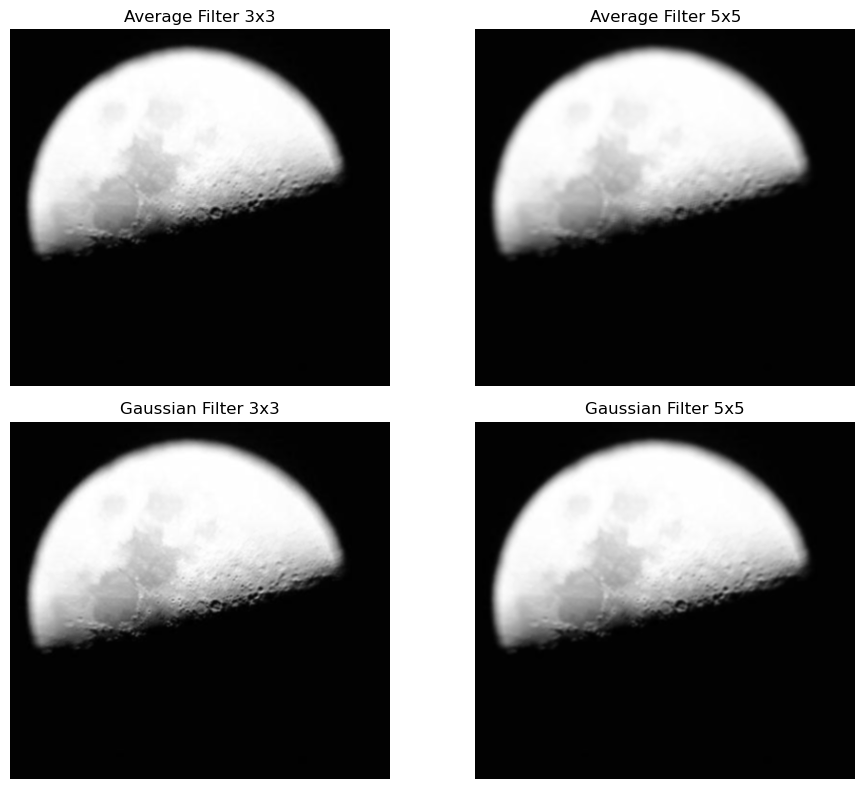

In [2]:
# Load the image in grayscale
image = cv2.imread('../datasets/blur-moon.jpg', cv2.IMREAD_GRAYSCALE)

# Apply average filter with 3x3 and 5x5 kernels
average_3x3 = cv2.blur(image, (3, 3))
average_5x5 = cv2.blur(image, (5, 5))

# Apply Gaussian filter with 3x3 and 5x5 kernels
gaussian_3x3 = cv2.GaussianBlur(image, (3, 3), 0)
gaussian_5x5 = cv2.GaussianBlur(image, (5, 5), 0)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(average_3x3, cmap='gray')
plt.title('Average Filter 3x3')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(average_5x5, cmap='gray')
plt.title('Average Filter 5x5')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gaussian_3x3, cmap='gray')
plt.title('Gaussian Filter 3x3')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gaussian_5x5, cmap='gray')
plt.title('Gaussian Filter 5x5')
plt.axis('off')

plt.tight_layout()
plt.show()

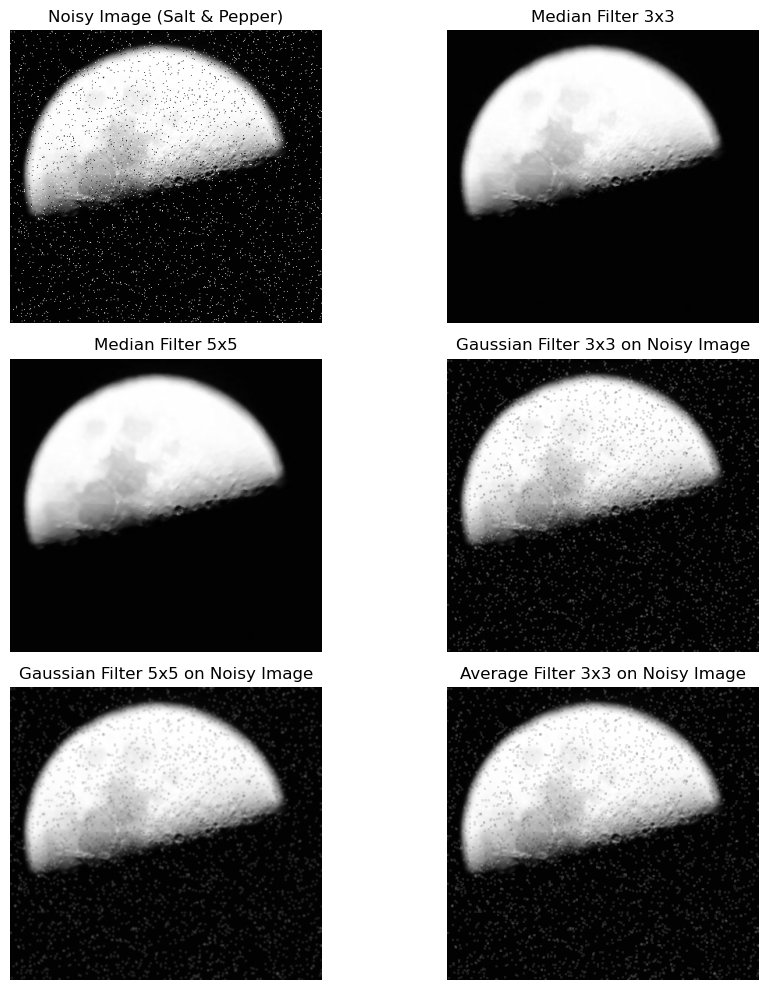

In [3]:

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size

    # Add salt noise (white pixels)
    num_salt = int(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise (black pixels)
    num_pepper = int(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy_image

image = cv2.imread('../datasets/blur-moon.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise to the image
noisy_image = add_salt_and_pepper_noise(image, 0.02, 0.02)

# Apply median filter with 3x3 and 5x5 kernels
median_3x3 = cv2.medianBlur(noisy_image, 3)
median_5x5 = cv2.medianBlur(noisy_image, 5)

# Apply Gaussian filter for comparison
gaussian_noisy_3x3 = cv2.GaussianBlur(noisy_image, (3, 3), 0)
gaussian_noisy_5x5 = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply average filter for comparison
average_noisy_3x3 = cv2.blur(noisy_image, (3, 3))
average_noisy_5x5 = cv2.blur(noisy_image, (5, 5))

# Display results
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(median_3x3, cmap='gray')
plt.title('Median Filter 3x3')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(median_5x5, cmap='gray')
plt.title('Median Filter 5x5')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(gaussian_noisy_3x3, cmap='gray')
plt.title('Gaussian Filter 3x3 on Noisy Image')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(gaussian_noisy_5x5, cmap='gray')
plt.title('Gaussian Filter 5x5 on Noisy Image')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(average_noisy_3x3, cmap='gray')
plt.title('Average Filter 3x3 on Noisy Image')
plt.axis('off')

plt.tight_layout()
plt.show()

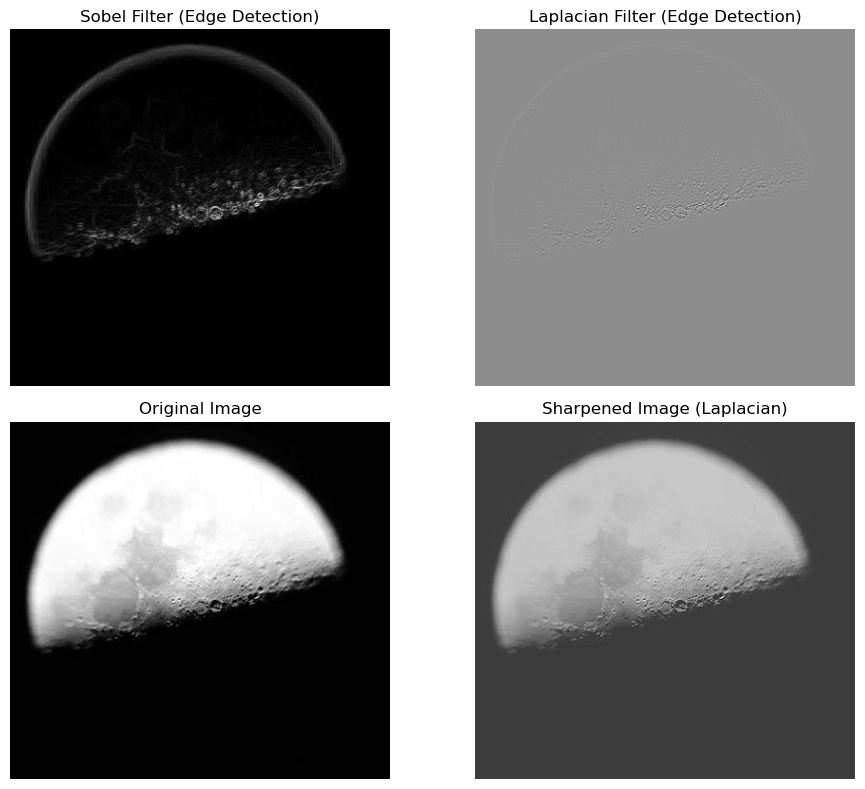

In [4]:
# Apply Sobel filter (1D kernel for edge detection)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

# Combine Sobel filters to get overall edge detection
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Apply Laplacian filter (2D kernel for edge detection)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Sharpen the image by combining the Laplacian with the original image
sharpened_image = cv2.addWeighted(image.astype(np.float64), 1.5, -laplacian, 0.5, 0)

# Display results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Filter (Edge Detection)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filter (Edge Detection)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Laplacian)')
plt.axis('off')

plt.tight_layout()
plt.show()